In [9]:
#import library
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt


In [12]:
# Definisi Rentang
x_minta = np.arange(0, 6000, 1)
x_sedia = np.arange(0, 700, 1)
x_produksi  = np.arange(0, 9000, 1)

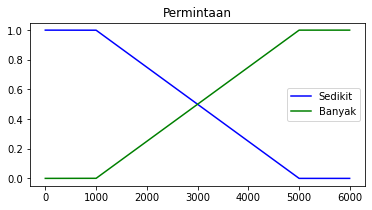

In [14]:
#membuat fungsi keanggotaan
#dari permintaan

minta_sd = fuzz.trapmf(x_minta, [0, 0, 1000, 5000])
minta_by = fuzz.trapmf(x_minta, [1000, 5000, 6000, 6000])

fig, ax = plt.subplots(nrows=1, figsize=(6, 3))
ax.plot(x_minta, minta_sd, 'b', linewidth=1.5, label='Sedikit')
ax.plot(x_minta, minta_by, 'g', linewidth=1.5, label='Banyak')
ax.set_title('Permintaan')
ax.legend()

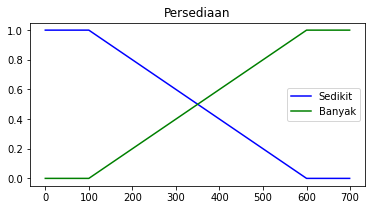

In [15]:
#membuat fungsi keanggotaan
#dari persediaan

sedia_sd = fuzz.trapmf(x_sedia, [0, 0, 100, 600])
sedia_by = fuzz.trapmf(x_sedia, [100, 600, 700, 700])

fig, ax1 = plt.subplots(nrows=1, figsize=(6, 3))
ax1.plot(x_sedia, sedia_sd, 'b', linewidth=1.5, label='Sedikit')
ax1.plot(x_sedia, sedia_by, 'g', linewidth=1.5, label='Banyak')
ax1.set_title('Persediaan')
ax1.legend()

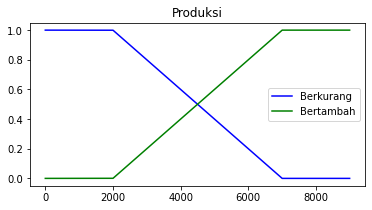

In [16]:
#membuat fungsi keanggotaan
#dari produksi

produksi_kr  = fuzz.trapmf(x_produksi, [0, 0, 2000, 7000])
produksi_tb  = fuzz.trapmf(x_produksi, [2000, 7000, 9000, 9000])

fig, ax2 = plt.subplots(nrows=1, figsize=(6, 3))
ax2.plot(x_produksi, produksi_kr, 'b', linewidth=1.5, label='Berkurang')
ax2.plot(x_produksi, produksi_tb, 'g', linewidth=1.5, label='Bertambah')
ax2.set_title('Produksi')
ax2.legend()

In [18]:
##  Crisp Input
minta = 1500
sedia = 500

In [19]:
## Fuzzyfication #Tsukamoto
in1 = []
in1.append(fuzz.interp_membership(x_minta, minta_sd, minta))
in1.append(fuzz.interp_membership(x_minta, minta_by, minta))
in2 = []
in2.append(fuzz.interp_membership(x_sedia, sedia_sd, sedia))
in2.append(fuzz.interp_membership(x_sedia, sedia_by, sedia))

print("Derajat Kranggotaan Persediaan ")
if in1[0]>0 :
    print("Sedikit : "+str(in2[0]))
if in1[1]>0 :
    print("Banyak  : "+ str(in2[1]))

print("")
print("Derajat Kranggotaan Permintaan")
if in2[0]>0 :
    print("Sedikit : "+str(in1[0]))
if in2[1]>0 :
    print("Banyak  : "+ str(in1[1]))

Derajat Kranggotaan Persediaan 
Sedikit : 0.2
Banyak  : 0.8

Derajat Kranggotaan Permintaan
Sedikit : 0.875
Banyak  : 0.125


In [20]:
## Rules and Inferences Tsukamoto
# krg = 7000 - (active_rule3)*5000
# tbh = 5000*deg + 2000

apred1  = np.fmin(in1[1], in2[1])
z1      = 5000*apred1 + 2000

apred2  = np.fmin(in1[0], in2[0])
z2      = 7000-(apred2)*5000

apred3  = np.fmin(in1[0], in2[1])
z3      = 7000-(apred3)*5000

apred4  = np.fmin(in1[1], in2[0])
z4      = 5000*apred4 + 2000

print(z1,z2,z3,z4)
## Defazzyfication
z = (apred1*z1 + apred2*z2 + apred3*z3 + apred4*z4)/ (apred1 + apred2+ apred3 + apred4)
print("Barang yang harus di produksi : "+str(int(z)))

2625.0 6000.0 3000.0 2625.0
Barang yang harus di produksi : 3405
